If we transform the variable of the Normal distribution with exp(x) we find the log-Normal distribution

Currently doesn't really work because the logarithm doesn't take negative inputs. Will have to figure this out at some other point. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def interpolate_log(x, a):
    if x >=0:
        return((1-a)*x + (a)*np.log(x))
    else:
        return((1-a)*x)
    
def interpolate_exp(x, a, y_0=1): 
    
    return((1-a)*x+ (a)*np.exp(x))

In [50]:
# interpolate a Gaussian

def fake_log(x, a):
    
    if x<=0:
        return(np.log(np.abs(x)))
    else:
        return(np.log(x))

def interpolate_log_Gaussian_exp(x, mu, sigma, a):
    c = 1#interpolate_exp(np.log(x), a)
    return(1/(sigma* np.sqrt(2*np.pi)) * np.exp(-0.5 * (interpolate_exp(fake_log(x,a), a)-mu)**2/sigma**2) * c)

<ipython-input-50-54a294ebf9b7>:6: RuntimeWarning: divide by zero encountered in log
  return(np.log(np.abs(x)))


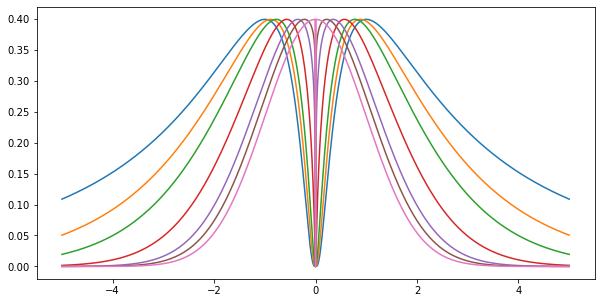

In [51]:
#plot the interpolation
m1, s1 = 0, 1
x_G = np.linspace(-5, 5, 1000+1)

yG0 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=0.001) for x_ in x_G])
yG18 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=1/8) for x_ in x_G])
yG14 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=1/4) for x_ in x_G])
yG12 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=1/2) for x_ in x_G])
yG34 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=3/4) for x_ in x_G])
yG78 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=7/8) for x_ in x_G])
yG1 = np.array([interpolate_log_Gaussian_exp(x_, m1, s1, a=0.999) for x_ in x_G])

plt.figure(figsize=(10, 5))
plt.plot(x_G, yG0)
plt.plot(x_G, yG18)
plt.plot(x_G, yG14)
plt.plot(x_G, yG12)
plt.plot(x_G, yG34)
plt.plot(x_G, yG78)
plt.plot(x_G, yG1)
plt.show();